# Data Analysis and Visualisation of European Soccer Dataset

## Some of the questions that can be raised:

### 1. Lionel Messi VS Cristiano Ronaldo
### 2. Away and Home goals comparision for each league
### 3. Top skills of Top 2 players in Top 6 teams in Top 3 leagues

# 1. Data Wrangling

## 1.1 Extracting Data

### Extracted data was in SQL DB formart and had to be converted to a csv for better understanding 

In [88]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('database.sqlite')
df_Country = pd.read_sql_query("SELECT * FROM Country", cnx)
df_League = pd.read_sql_query("SELECT * FROM League", cnx)
df_Match = pd.read_sql_query("SELECT * FROM Match", cnx)
df_Player = pd.read_sql_query("SELECT * FROM Player", cnx)
df_PlayerAttr = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df_Team = pd.read_sql_query("SELECT * FROM Team", cnx)
df_TeamAttr = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)

In [89]:
# df_Country.to_csv(r'C:\Users\User\Desktop\data\soccer\Country.csv')
# df_League.to_csv(r'C:\Users\User\Desktop\data\soccer\League.csv')
# df_Match.to_csv(r'C:\Users\User\Desktop\data\soccer\Match.csv')
# df_Player.to_csv(r'C:\Users\User\Desktop\data\soccer\Player.csv')
# df_PlayerAttr.to_csv(r'C:\Users\User\Desktop\data\soccer\Player_Attributes.csv')
# df_Team.to_csv(r'C:\Users\User\Desktop\data\soccer\Team.csv')
# df_TeamAttr.to_csv(r'C:\Users\User\Desktop\data\soccer\Team_Attributes.csv')

## 1.2 Investigating the Dataset

### Lets explore the dataset

In [91]:
import pandas as pd
import numpy as np
import scipy.stats
from IPython import display
from ipywidgets import interact, widgets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import re
import mailbox
import csv

In [93]:
# !pip install plotly
# !pip install cufflinks

In [94]:
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

import warnings
warnings.filterwarnings('ignore')

## Dataset can be read in two ways:
#### 1. SQLite database
#### 2. CSV files generated.

### Player Dataset

In [95]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df_Player.shape[0], df_Player.shape[1]))

Total Row Number: 11060 
Total Col Number: 7


In [96]:
# Imporing data from a SQLite Database
df_Player.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [97]:
df_Player.shape

(11060, 7)

In [98]:
df_Player.describe()


,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [99]:
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [100]:
nullvalues = df_Player.loc[:, df_Player.isnull().any()].isnull().sum().sort_values(ascending=False)

print(nullvalues)

Series([], dtype: float64)


### Player Attributes Dataset

In [101]:
# Imporing data from a SQLite Database
df_PlayerAttr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [102]:
print("Total Number of rows: {0} \nTotal Number of cols: {1}".format(df_PlayerAttr.shape[0], df_PlayerAttr.shape[1]))

Total Row Number: 183978 
Total Col Number: 42


In [103]:
df_PlayerAttr.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [104]:
df_PlayerAttr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

### Count of null values in the dataset

In [105]:
nullvalues = df_PlayerAttr.loc[:, df_PlayerAttr.isnull().any()].isnull().sum().sort_values(ascending=False)

print(nullvalues)

attacking_work_rate    3230
agility                2713
volleys                2713
balance                2713
sliding_tackle         2713
jumping                2713
vision                 2713
curve                  2713
ball_control            836
long_passing            836
free_kick_accuracy      836
dribbling               836
gk_reflexes             836
short_passing           836
acceleration            836
finishing               836
crossing                836
defensive_work_rate     836
preferred_foot          836
potential               836
heading_accuracy        836
reactions               836
sprint_speed            836
gk_positioning          836
shot_power              836
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
penalties               836
marking                 836
standing_tackle         836
gk_diving               836
gk_handling         

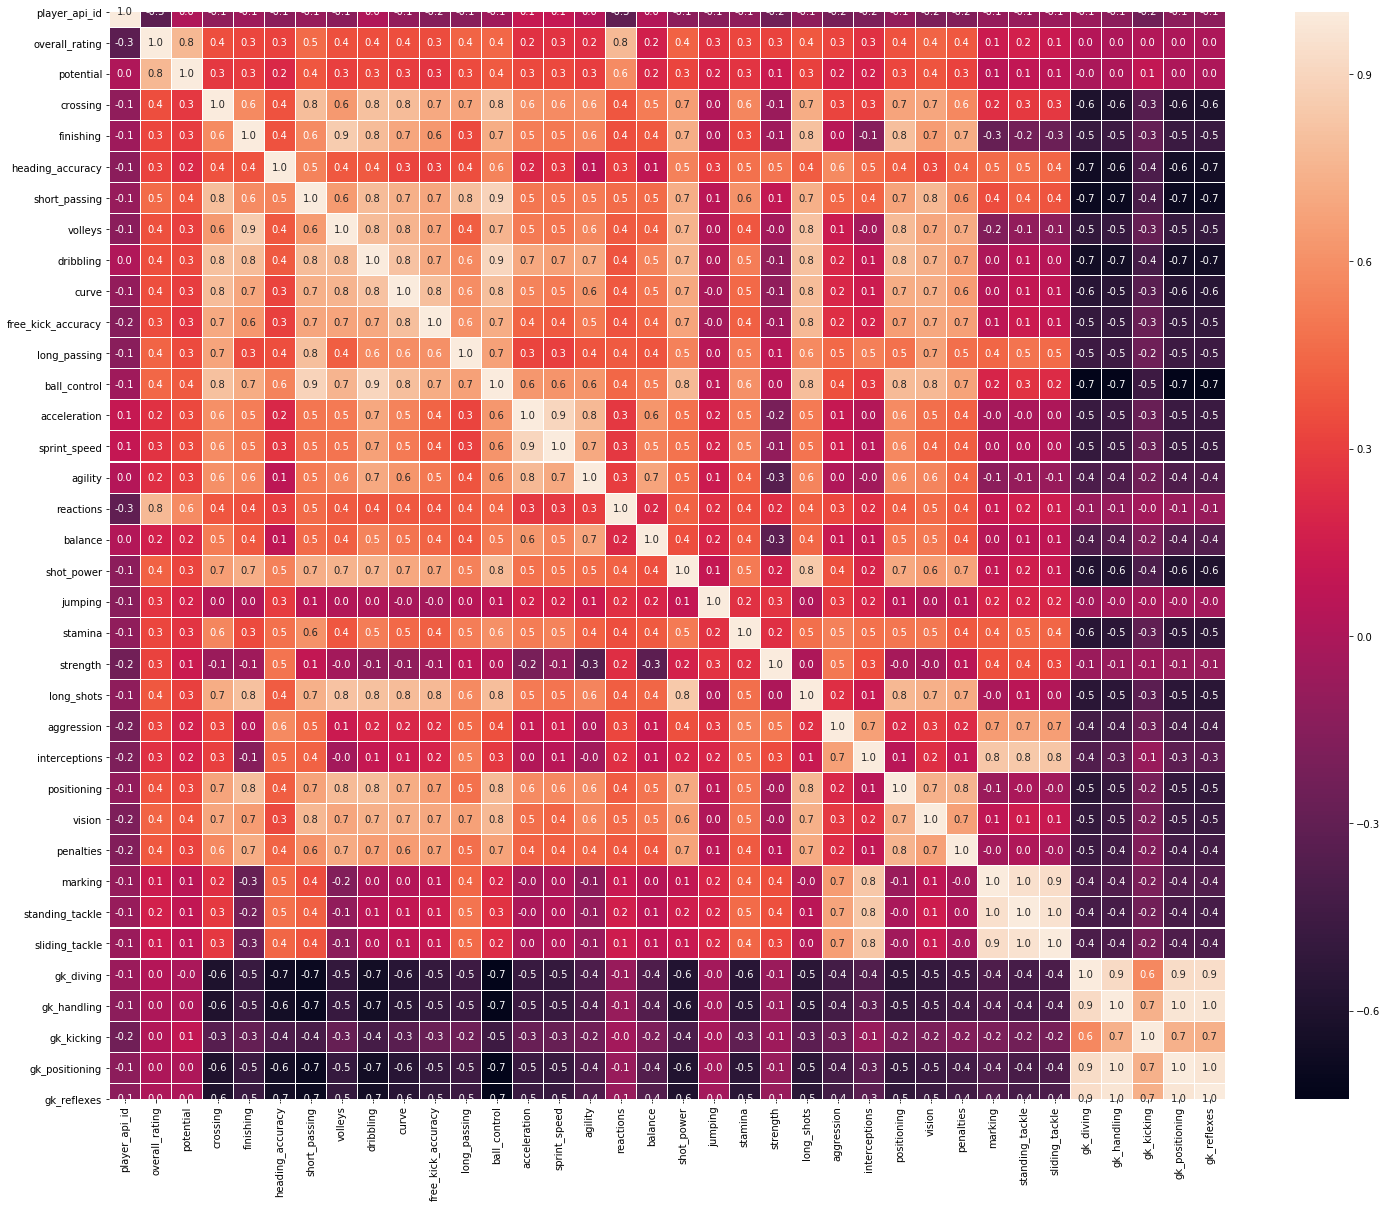

In [106]:
f,ax = plt.subplots(figsize=(25,20))
sns.heatmap(df_PlayerAttr.iloc[:,2:].corr(),annot=True, linewidths=.1, fmt='.1f', ax=ax)

plt.show()

### Lot of relationships have emmerged Eg: relationship between ball control and long shots, penalties and ball curve etc

# Team Dataset


In [107]:
# Imporing data from a SQLite Database
df_Team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [108]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df_Team.shape[0], df_Team.shape[1]))

Total Row Number: 299 
Total Col Number: 5


In [109]:
df_Team.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [110]:
df_Team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [111]:
nullvalues = df_Team.loc[:, df_Team.isnull().any()].isnull().sum().sort_values(ascending=False)

print(nullvalues)

team_fifa_api_id    11
dtype: int64


# Team Attribute Dataset

In [112]:
# Imporing data from a SQLite Database
df_TeamAttr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [113]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df_TeamAttr.shape[0], df_TeamAttr.shape[1]))

Total Row Number: 1458 
Total Col Number: 25


In [114]:
df_TeamAttr.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [115]:
df_TeamAttr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [116]:
nullvalues = df_TeamAttr.loc[:, df_TeamAttr.isnull().any()].isnull().sum().sort_values(ascending=False)

print(nullvalues)

buildUpPlayDribbling    969
dtype: int64


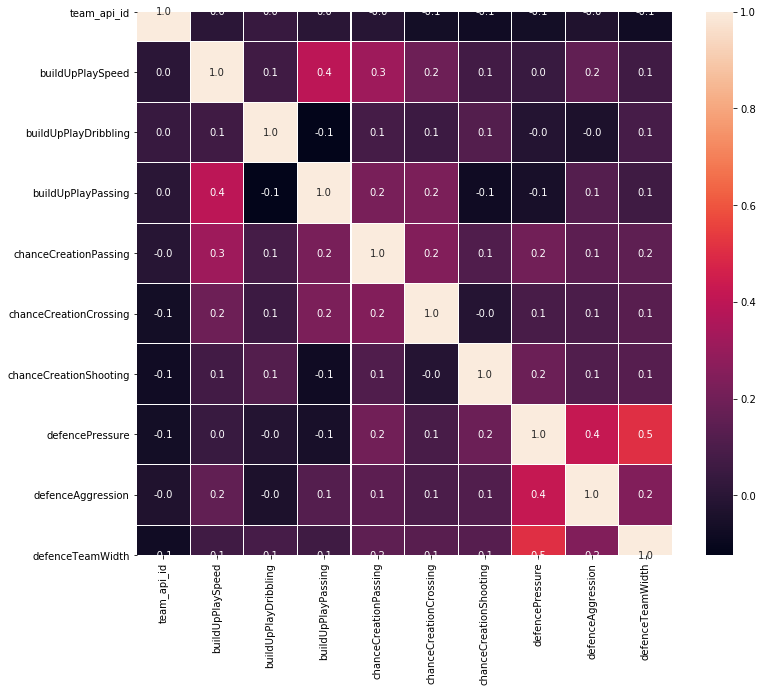

In [117]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_TeamAttr.iloc[:,2:].corr(),annot=True, linewidths=.1, fmt='.1f', ax=ax)

plt.show()

# League Dataset

In [118]:
# Imporing data from a SQLite Database
df_League.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [119]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df_League.shape[0], df_League.shape[1]))

Total Row Number: 11 
Total Col Number: 3


In [120]:
df_League.describe()

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


In [121]:
df_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [122]:
nullvalues = df_League.loc[:, df_League.isnull().any()].isnull().sum().sort_values(ascending=False)

print(nullvalues)

Series([], dtype: float64)


## Data Cleaning

## 2.1 Removing unwanted rows and columns from the data sets.

### Dropping columns from Player Dataset

In [123]:
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [124]:
df_Player = df_Player.drop('birthday', 1)
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 6 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 518.6+ KB


In [125]:
df_Player = df_Player.drop('id', 1)
df_Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 5 columns):
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 432.2+ KB


In [126]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df_Player.shape[0], df_Player.shape[1]))

Total Row Number: 11060 
Total Col Number: 5


### Dropping columns from Player Attributes dataset

In [127]:
df_PlayerAttr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [128]:
df_PlayerAttr = df_PlayerAttr.drop('id', 1)


In [129]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df_PlayerAttr.shape[0], df_PlayerAttr.shape[1]))

Total Row Number: 183978 
Total Col Number: 41


### Merging player and player attributes dataset from the database

In [130]:
#Merging the datasets using full outer join
df_mp = pd.merge(df_Player,df_PlayerAttr, on='player_api_id', how='outer') 

In [131]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df_mp.shape[0], df_mp.shape[1]))

Total Row Number: 183978 
Total Col Number: 45


In [132]:
# df_mp.to_csv(r'C:\Users\User\Desktop\data\soccer\PlayerMerged.csv')

### Loading data from csv

In [133]:
# df_mp = pd.read_csv("PlayerMerged.csv")
df_mp = pd.read_csv('PlayerMerged.csv')

In [134]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df_mp.shape[0], df_mp.shape[1]))

Total Row Number: 10848 
Total Col Number: 44


In [135]:
df_mp.head()

,player_api_id,player_name,player_fifa_api_id,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,30981,Lionel Messi,158023,170.18,159,4/25/2014 0:00,94,97,left,medium,...,90.0,76,25,21,20.0,6,11,15,14,8
1,30893,Cristiano Ronaldo,20801,185.42,176,10/16/2015 0:00,93,93,right,high,...,81.0,85,22,31,23.0,7,11,15,14,11
2,30829,Wayne Rooney,54050,175.26,183,2/22/2007 0:00,93,93,right,high,...,88.0,80,28,42,41.0,11,7,71,11,12
3,30717,Gianluigi Buffon,1179,193.04,201,2/22/2007 0:00,93,93,right,medium,...,70.0,88,8,8,9.0,91,93,76,96,93
4,39854,Xavi Hernandez,10535,170.18,148,8/30/2011 0:00,92,92,right,medium,...,97.0,75,55,62,61.0,5,15,12,5,9


In [136]:
df_mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10848 entries, 0 to 10847
Data columns (total 44 columns):
player_api_id          10848 non-null int64
player_name            10848 non-null object
player_fifa_api_id     10848 non-null int64
height                 10848 non-null float64
weight                 10848 non-null int64
date                   10848 non-null object
overall_rating         10848 non-null int64
potential              10848 non-null int64
preferred_foot         10848 non-null object
attacking_work_rate    10325 non-null object
defensive_work_rate    10848 non-null object
crossing               10848 non-null int64
finishing              10848 non-null int64
heading_accuracy       10848 non-null int64
short_passing          10848 non-null int64
volleys                10386 non-null float64
dribbling              10848 non-null int64
curve                  10386 non-null float64
free_kick_accuracy     10848 non-null int64
long_passing           10848 non-null int64


In [137]:
#Import libraries
import numpy as np
import pandas as pd
import sqlite3
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [138]:
# from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
import itertools
from subprocess import check_output

In [139]:
## Import Data

with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)
lat_long = pd.read_excel("latlong.xlsx",sheet_name="Sheet1")

In [140]:
countries.head()
leagues.head()
matches.head()
teams.head()
player.head()
player_attributes.head()
sequence.head()
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [141]:
#Merge country and leauge data
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [142]:
#subsetting data with necessary columns
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

In [143]:
matches_new = matches_new.drop("id",axis=1)

In [144]:
#merge leauge data with match data
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")

In [145]:
#chech null values
data.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [146]:
#Unique values in data
data.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

In [147]:
from plotly.offline import iplot
import cufflinks as cf
import plotly as py
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [148]:
#merge player data with player attributes
player_info = player_attributes.merge(player,left_on="player_api_id",right_on="player_api_id",how="left")

In [149]:
i =["id_x","id_y",'player_fifa_api_id_y','height', 'weight', 'weight_kg', 'height_m', 'bmi', 'year','age','birthday']
player_info = player_info[[x for x in player_info.columns if x not in i]]
player_info.columns

Index(['player_fifa_api_id_x', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'player_name'],
      dtype='object')

In [150]:
play=player_info.head(50)


In [151]:
string = ['Andres Iniesta','Cristiano Ronaldo', 'Lionel Messi','Luis Suarez','Neymar', 'Ronaldinho','Wayne Rooney','Zlatan Ibrahimovic']

cols   = ["player_name",'overall_rating','potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'standing_tackle', 'sliding_tackle']


In [152]:
play   = player_info[player_info["player_name"].isin(string)]

In [153]:
play = play[cols]
play = play.groupby("player_name")[cols].mean().reset_index()

play[1:]


,player_name,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,standing_tackle,sliding_tackle
1,Cristiano Ronaldo,91.280000,93.480000,83.880000,91.120000,85.520000,82.280000,85.560000,92.640000,88.000000,...,87.600000,78.680000,89.880000,61.280000,35.640000,86.480000,80.680000,83.600000,30.840000,23.000000
2,Lionel Messi,92.192308,95.230769,83.346154,92.230769,69.269231,88.807692,87.538462,96.461538,87.692308,...,77.538462,59.692308,86.923077,49.269231,34.230769,90.538462,90.269231,80.153846,21.846154,20.115385
3,Luis Suarez,85.275000,87.525000,75.675000,85.650000,72.100000,79.175000,83.475000,87.875000,84.300000,...,83.800000,75.000000,80.525000,75.550000,44.450000,85.125000,82.650000,83.275000,42.300000,38.000000
4,Neymar,83.800000,90.760000,70.320000,83.480000,63.320000,75.680000,81.240000,91.600000,76.520000,...,78.320000,44.080000,72.320000,54.400000,39.040000,84.560000,76.840000,79.760000,26.960000,33.000000
5,Ronaldinho,82.840000,84.880000,83.520000,75.960000,54.200000,87.080000,83.120000,89.560000,89.600000,...,50.560000,70.800000,77.840000,52.800000,35.400000,74.120000,87.520000,85.680000,28.000000,21.160000
6,Wayne Rooney,87.222222,87.944444,78.472222,87.861111,78.583333,83.138889,88.694444,82.694444,83.500000,...,88.000000,86.166667,85.361111,90.388889,48.611111,87.166667,84.166667,82.333333,51.833333,37.777778
7,Zlatan Ibrahimovic,88.285714,90.047619,72.380952,90.000000,79.714286,84.238095,90.047619,89.380952,80.952381,...,75.714286,90.571429,86.523810,79.666667,38.714286,83.095238,82.619048,88.000000,43.809524,26.809524


In [154]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
cats = list(play)
N    = len(cats)

In [155]:
values = play.loc[1].values.flatten().tolist()
values += values   
values = play.loc[1].drop("player_name")


In [156]:
# values0 = play.loc[0].values.flatten().tolist()
# values0 += values0   
# values0 = play.loc[0].drop("player_name")
values1 = play.loc[1].values.flatten().tolist()
values1 += values1   
values1 = play.loc[1].drop("player_name")

In [157]:
values2 = play.loc[2].values.flatten().tolist()
values2 += values2   
values2 = play.loc[2].drop("player_name")

In [158]:
col1   = ['overall_rating','potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'standing_tackle', 'sliding_tackle']

In [159]:
play['player_name']

0        Andres Iniesta
1     Cristiano Ronaldo
2          Lionel Messi
3           Luis Suarez
4                Neymar
5            Ronaldinho
6          Wayne Rooney
7    Zlatan Ibrahimovic
Name: player_name, dtype: object

## Plotting

In [231]:
import plotly.graph_objects as go
import plotly

# r = values2
fig = make_subplots(
    rows=1, cols=2,
     
#     subplot_titles=('Ronaldo','Messi'),
    specs=[[{"type": "polar"}, {"type": "polar"}]]
)

In [232]:
fig.add_trace(go.Scatterpolar(
      r=values1,
      theta=col1,
      fill='toself',
      name='Ronaldo',
      mode='lines+markers',
      hoveron = 'points + fills', # select where hover is active
#       text="value, attribute",
      hoverinfo = 'theta + r',
      ), row=1,col=1)

fig.add_trace(go.Scatterpolar(
      r=values2,
      theta=col1,
      fill='toself',
      name='Messi',
      marker_color='rgba(152, 0, 0, 1)',
      text=values2,
#       text2=values2,
      mode='lines+markers',
      hoveron = 'points + fills', # select where hover is active
#       text="value, attribute",
      hoverinfo = 'theta + r',
      ),row=1,col=2)

In [228]:
plotly.offline.plot(fig, filename='name.html')

'name.html'

In [261]:
fig.update_layout( 
#     autosize=True,
    width=1500,
    height=700,
#     xaxis = 0.5,
    title={
        'text': "Messi vs Ronaldo",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    polar=dict(
    
    radialaxis=dict(
      visible=True,
#       x=12,
      color='#111111',
#       range=[0, 100]
    )
    ),
    
  showlegend=True)

# fig.show()
plotly.offline.plot(fig, filename='name.html')

'name.html'

# Output to D3js

In [9]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)
lat_long = pd.read_excel("latlong.xlsx",sheet_name="Sheet1")

In [ ]:
#Merge country and leauge data
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

In [10]:


matches.head()



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
#subsetting data with necessary columns
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

matches_new = matches_new.drop("id",axis=1)

#merge leauge data with match data
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")
#chech null values
data.isnull().sum()

In [12]:
data.to_csv("sunburst.csv")

In [ ]:
c=data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"})

c.to_json('total_goals.json')

# League and Teams

In [272]:
import plotly.graph_objects as go
import plotly
import plotly as py
from plotly.graph_objs import *

trace1 = {
     "type": "sunburst", 
      "marker": {"line": {"width": 2},
                 },
      "maxdepth":4,
      "marker":dict(
        colors=["#ffffff",
                "#38003c","#FBE122","#DA291C",
#                 "#DA291C","#034694",'#DA291C','#DA291C',"#034694","#034694",
#                 "#404040","#004521","#404040","#404040","#004521","#004521"
#                 "#DC052D","#1D9053"
               ],
#         colorscale='Blackbody',
                    ),
      "labels": ["league","English Premier League","France Ligue 1","Bundesliga German","Manchester United","Chelsea","Wayne Rooney","Cristiano Ronaldo","Frank Lampard","Didier Drogba"
                  ,"Paris Saint-Germain","Saint-Étienne","Kylian Mbappé","Neymar Jr","Denis Bouanga","Romain Hamouma","dribble","attack","defence","tackle","pass","volly","ball control","stamina","long shots"
                  ,"Penalties","Free Kick","Dribble","Heading","Finish","Sprint","Position","Stamina","Shots","Aglity","Curve","Speed","Crossing","Tackle","Passing","Bayern Munich","Werder Bremen"
                  ,"Thomas Müller","Robert Lewandowski","Claudio Pizarro","Niclas Füllkrug","Volly","Control"," Sprint","Reaction","Balance"," Crossing"," Speed"," Volly"," Stamina","Attack"," Shots","Pass", 
                ], 
      "leaf":{'opacity': 0.75},
      "parents": ["","league","league","league","English Premier League","English Premier League","Manchester United","Manchester United","Chelsea","Chelsea","France Ligue 1","France Ligue 1","Paris Saint-Germain","Paris Saint-Germain","Saint-Étienne","Saint-Étienne"
                  ,"Didier Drogba","Didier Drogba","Didier Drogba","Frank Lampard","Frank Lampard","Frank Lampard","Wayne Rooney","Wayne Rooney","Wayne Rooney","Cristiano Ronaldo","Cristiano Ronaldo","Cristiano Ronaldo","Kylian Mbappé","Kylian Mbappé","Kylian Mbappé"
                  ,"Neymar Jr","Neymar Jr","Neymar Jr","Denis Bouanga","Denis Bouanga","Denis Bouanga","Romain Hamouma","Romain Hamouma","Romain Hamouma","Bundesliga German","Bundesliga German","Bayern Munich","Bayern Munich","Werder Bremen","Werder Bremen"
                  ,"Thomas Müller","Thomas Müller","Thomas Müller","Robert Lewandowski","Robert Lewandowski","Robert Lewandowski","Claudio Pizarro","Claudio Pizarro","Claudio Pizarro","Niclas Füllkrug"
                  ,"Niclas Füllkrug","Niclas Füllkrug"
                 ], 
      "branchvalues": "total",
#        "hovertemplate":'<b>%{label}', #</b> <br> %{value}%<br>',
      "outsidetextfont": {
      "size": 20, 
      "color": "#111111"
        
      }
    }

In [273]:
data = Data([trace1])
layout = {   
      "margin": {
        "b": 50, 
        "l": 50, 
        "r": 50, 
        "t": 50
      }
     
    }

In [274]:
fig = Figure(data=data, layout=layout)
fig.update_layout(  title={
        'text': "League, Teams and Players",
        'y':1,
        'x':0.5,
        'font' : dict(
            family="Courier New, monospace",
            size=24,
            color="#111111"
                 ),
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()
plotly.offline.plot(fig, filename='sunburst.html')

'sunburst.html'